# **Лабораторная работа №7. Визуализация в решении исследовательских и научных задач.**

In [1]:
!pip install ChernoffFace

In [2]:
import math
import statistics as stat
import scipy.stats as ss

import plotly
import plotly.graph_objs as go
import plotly.graph_objects as go
from plotly.offline import iplot
import plotly.express as px
from plotly.subplots import make_subplots

import matplotlib.cm
import pylab as pl
from ChernoffFace import *

import missingno as msno

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Часть 1**

## 1. ПЕРВИЧНЫЙ АНАЛИЗ ДАННЫХ. ВИЗУАЛИЗАЦИЯ

**1. Загрузите датасет. Укажите тип переменных**

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/Fish.csv')

In [ ]:
df1.head(5)

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


**Описание данных**

Всего в наборе данных 159 строк и 7 признаков
. Целевая переменная - 'Вес'.

| Название колонки | Подробности
| ------------|--------------
| Species | Вид рыбы
| Weight | Вес рыбы в граммах
| Length1 | Вертикальная длина в CM
| Length2 | Диагональная длина в СМ
| Length3 | Поперечная длина рыбы в СМ
| Height | Высота в СМ
| Width | Диагональная ширина в СМ

Категориальные признаки: Species.

Количественные: Weight, Length1, Length2, Length3, Height, Width.

**2. Выведите описательную статистику для переменных датасета**

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [ ]:
df1.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


Исключим данные с рыбами весом менее 1 гр.

In [ ]:
df1 = df1[df1['Weight'] >= 1]

**3. Используя визуализацию, покажите, сколько различных видов рыб включает ваш набор данных. Используйте интерактивную визуализацию**

In [ ]:
sns.set_style("darkgrid")
colors = px.colors.qualitative.Plotly[:7]
Species1 = df1['Species'].value_counts()

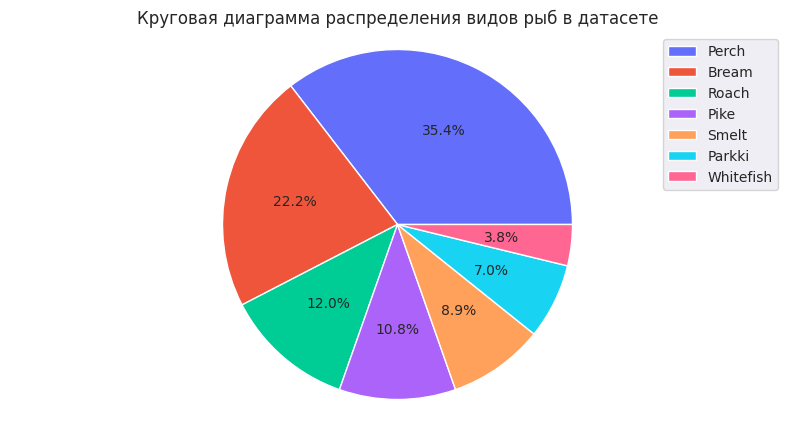

In [ ]:
# Круговая диаграмма
vals = Species1
labels = Species1.index
fig, ax = plt.subplots(figsize=(10,5))
ax.pie(vals, autopct='%1.1f%%', colors=colors)
ax.axis('equal')
plt.legend(labels=labels)
plt.title('Круговая диаграмма распределения видов рыб в датасете')
plt.show()

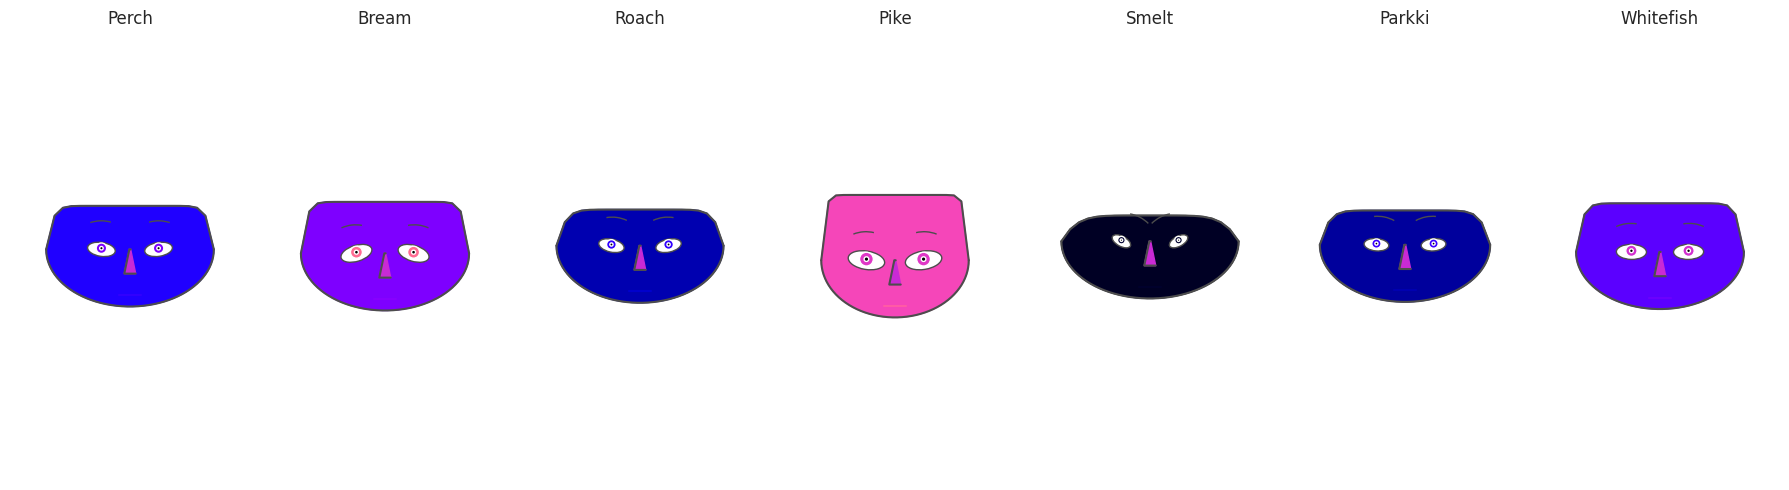

In [ ]:
# Лица Чернова
Species2 = pd.DataFrame(df1['Species'])
Species2[['Weight','Length1','Length2','Length3','Height','Width']] = variables_rescale(df1[['Weight','Length1','Length2','Length3','Height','Width']])

df_spec = Species2.groupby(['Species']).mean().reset_index()
d = {0:1, 1:5, 2:0, 3:3, 4:2, 5:4, 6:6}
df_spec = df_spec.rename(d).sort_index()
df_spec = df_spec.drop(['Species'], axis='columns')

fig = chernoff_face(data=df_spec, titles=['Perch', 'Bream', 'Roach', 'Pike', 'Smelt', 'Parkki', 'Whitefish'],
                    n_columns=7, long_face=False, color_mapper=matplotlib.cm.gnuplot2,
                    figsize=(18, 5), dpi=100)
fig.tight_layout()
matplotlib.pyplot.show()

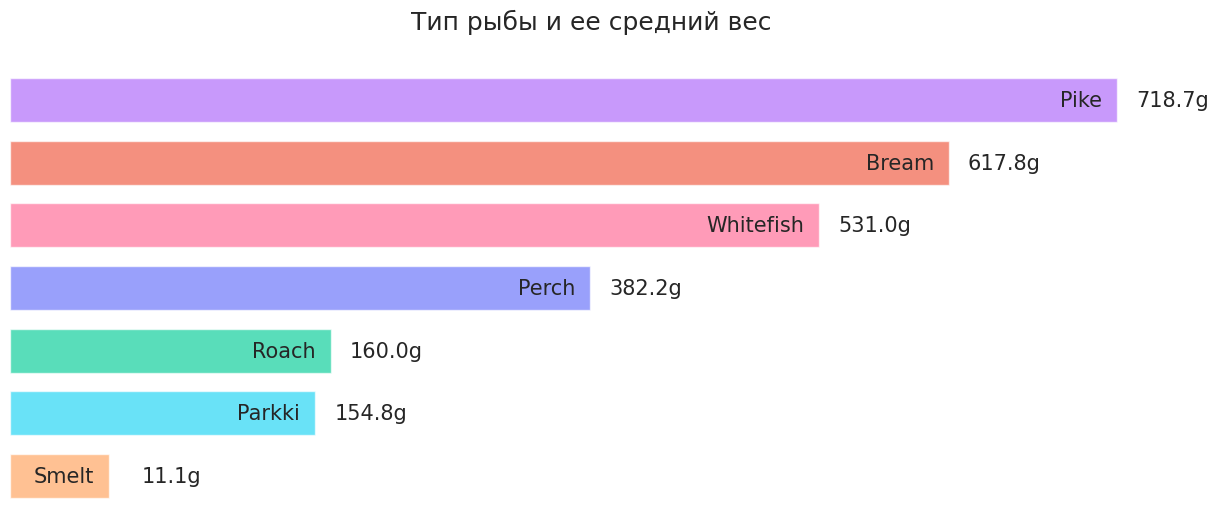

In [ ]:
#@title
fish = ['Pike','Bream','Whitefish','Perch','Roach','Parkki','Smelt']
Weights = [14.5, 12.3, 10.6, 7.6, 4.2, 4, 1.3]

fig = plt.figure(figsize=(15,6))
plt.barh(width=Weights, y=fish, height=0.7, color=['#AB63FA', '#EF553B','#FF6692','#636EFA','#00CC96', '#19D3F3', '#FFA15A'], alpha=0.65)

s = ['718.7g', '617.8g', '531.0g', '382.2g', '160.0g', '154.8g', '11.1g']
x = [15.7, 13.5, 11.8, 8.8, 5.4, 5.2, 2.5]
y = [0,1,2,3,4,5,6]

s1 = ['Pike','Bream','Whitefish','Perch','Roach','Parkki','Smelt']
x1 = [14.3, 12.1, 10.4, 7.4, 4.0, 3.8, 1.1]
y1 = [0,1,2,3,4,5,6]


for i in range(7):
    plt.text(s = s[i], x=x[i], y=y[i] , fontsize=15,va='center',ha='right')
    plt.text(s = s1[i], x=x1[i], y=y1[i], fontsize=15,va='center',ha='right')

plt.title("Тип рыбы и ее средний вес", fontsize=18, pad=20)
plt.axis('off')
plt.gca().invert_yaxis()
plt.show()

**4. Исследуйте, есть ли какие-либо зависимые переменные**


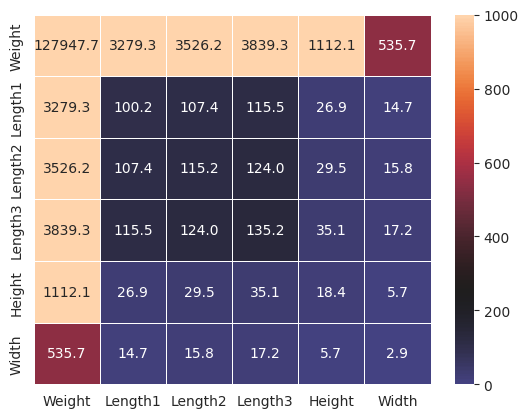

In [ ]:
# Ковариационная матрица
sns.heatmap(df1.cov(), annot=True, fmt=".1f", linewidths=0.5, linecolor='white', vmin=0, vmax=1000, center=250)
plt.show()

**Выборочная ковариация** — это мера, которая количественно определяет силу и направление взаимосвязи между парой переменных:

* Если корреляция положительная, то и ковариация тоже положительная. Более сильное отношение соответствует более высокой ценности ковариации.
* Если корреляция отрицательна, то и ковариация также отрицательна. Более сильное отношение соответствует более низкому (или более высокому абсолютному) значению ковариации.
* Если корреляция слабая, то ковариация близка к нулю.

Значения по диагоналям матрицы — это дисперсии каждого признака.

<Axes: >

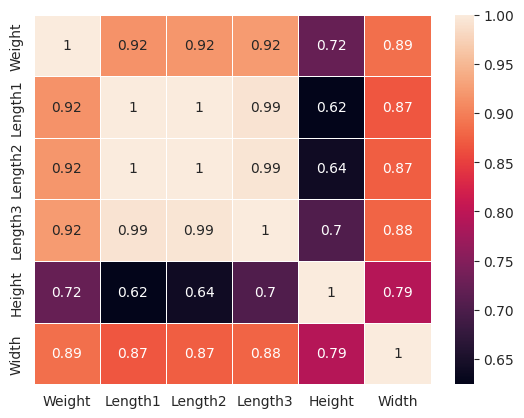

In [ ]:
# Корреляционная матрица
sns.heatmap(df1.corr(), annot = True, linewidths=0.5, linecolor='white')

**Коэффициент корреляции**. К нему надо относиться как к стандартизированной ковариации.
* cor > 0 указывает на положительную корреляцию.
* cor < 0 указывает на отрицательную корреляцию.
* cor = 1 полная линейная зависимость между переменными.
* r = −1 полное отсутствие линейной зависимости.
* r ≈ 0 корреляция между переменными отсутствует.

Видим высокую положительную корреляцию практически между всеми признаками.
Признаки

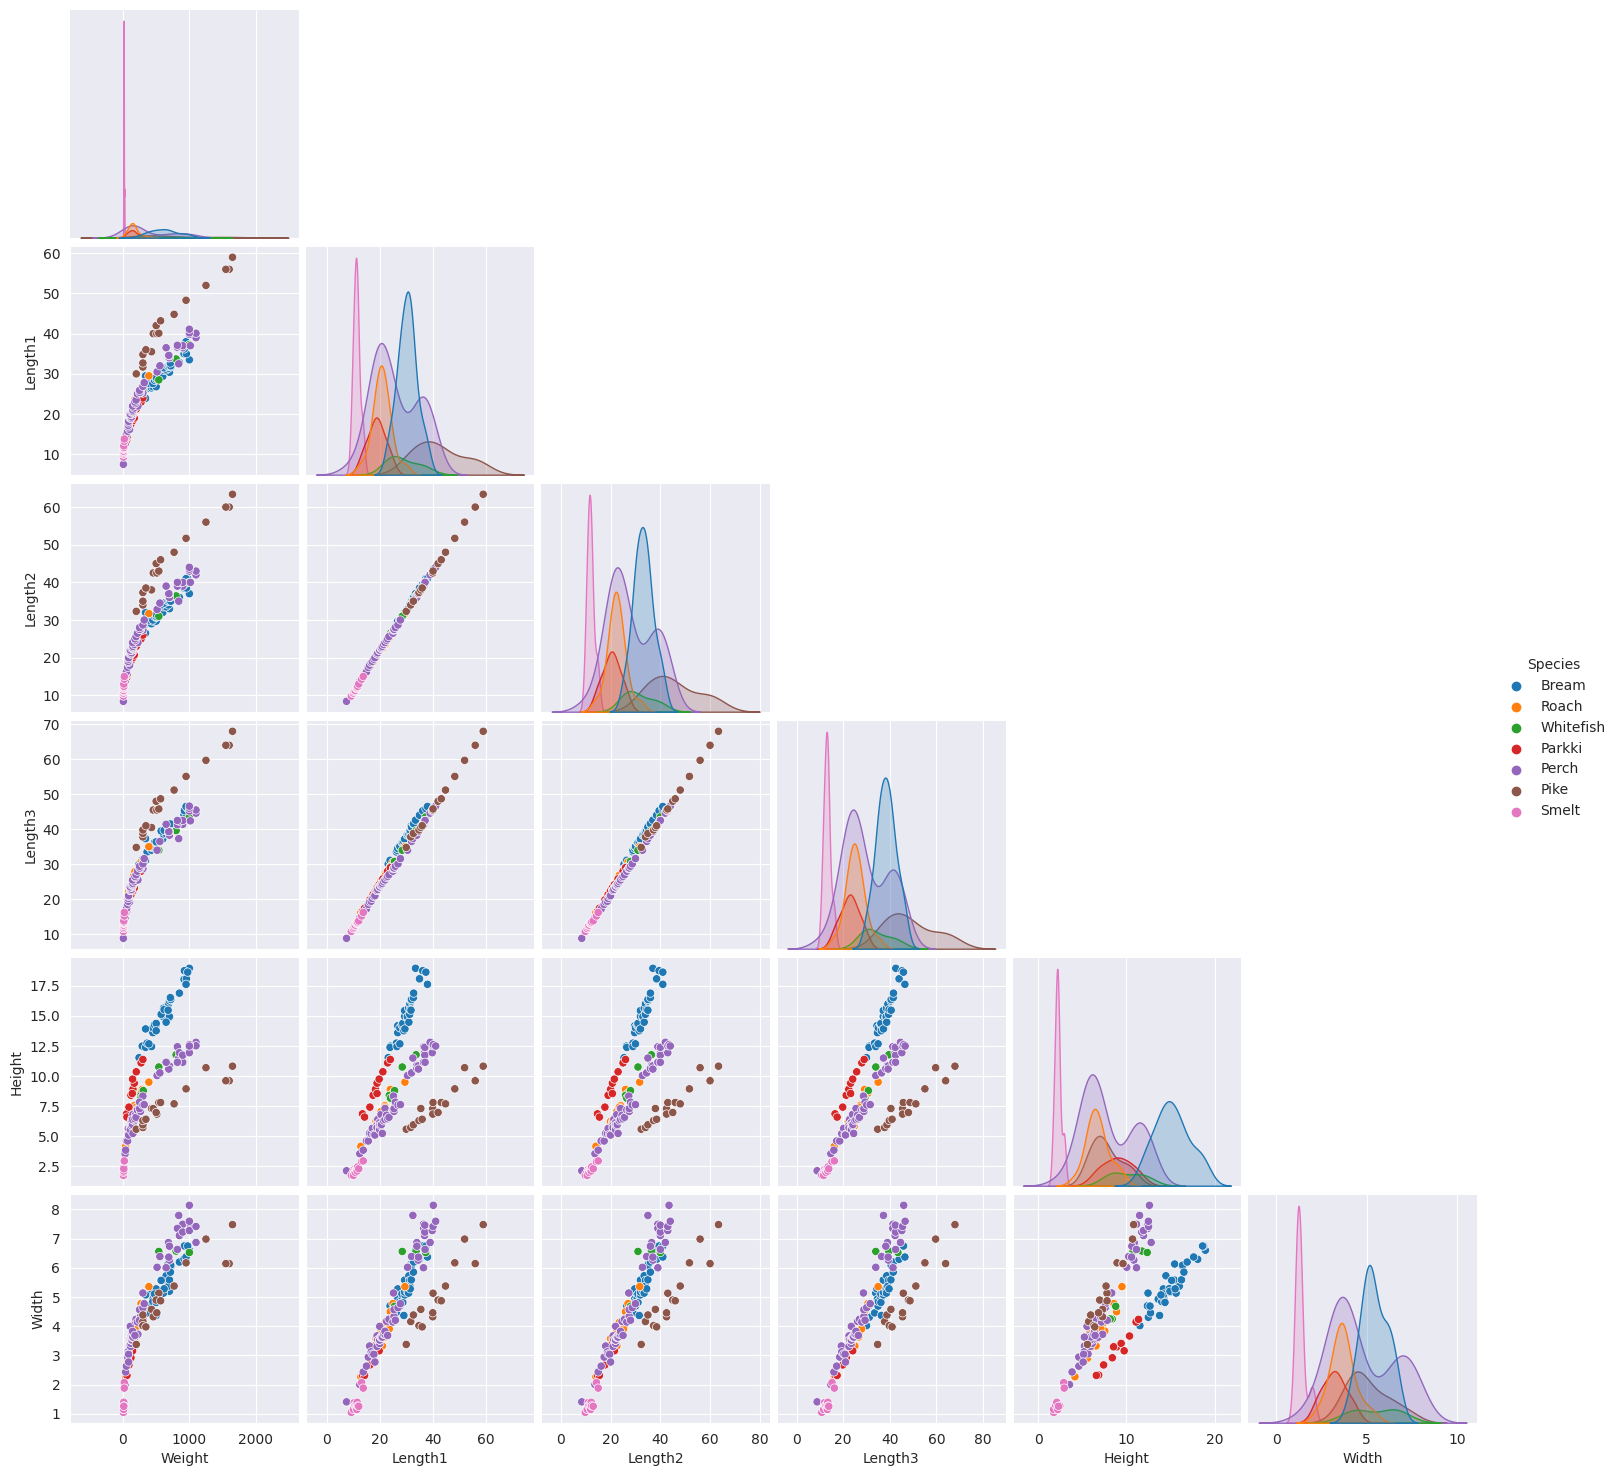

In [ ]:
sns.pairplot(df1, hue = "Species", corner=True)

Наблюдаем линейную зависимость между предикторами для каждого вида рыб. Также видим, что целевая переменная Weight имеет с остальными логарифмическую зависимость.

**5. Определите тип распределения количественных переменных**

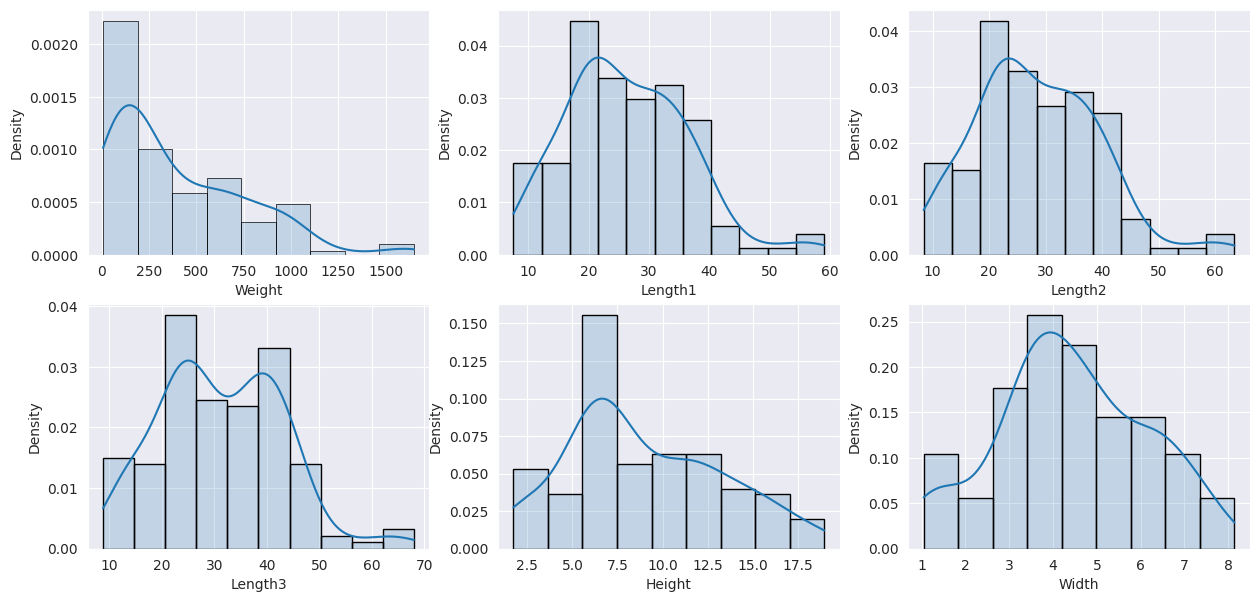

In [ ]:
#@title
# Гистограммы
fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize=(15, 7))

sns.histplot(data=df1['Weight'], alpha = 0.2, edgecolor='k',
         linewidth=0.5,kde=True,stat="density", ax=axs[0,0])

sns.histplot(data=df1['Length1'],alpha = 0.2, edgecolor='k',
         linewidth=1,kde=True,stat="density", ax=axs[0,1])

sns.histplot(data=df1['Length2'],alpha = 0.2, edgecolor='k',
         linewidth=1,kde=True,stat="density", ax=axs[0,2])

sns.histplot(data=df1['Length3'],alpha = 0.2, edgecolor='k',
         linewidth=1,kde=True,stat="density", ax=axs[1,0])

sns.histplot(data=df1['Height'],alpha = 0.2, edgecolor='k',
         linewidth=1,kde=True,stat="density", ax=axs[1,1])

sns.histplot(data=df1['Width'],alpha = 0.2, edgecolor='k',
         linewidth=1,kde=True,stat="density", ax=axs[1,2])

plt.show()

Все распределения ассиметричны, ненормальны. Распредеелние признака Weight приближенно к экспоненциальному.

In [ ]:
# Интерактивная гистограмма по видам рыб
fig = px.histogram(df1, x='Width', color='Species', barmode='group')
fig.show()

**6. Существуют ли в этом наборе данных аномальные
наблюдения?**

Выбросами посчитали данные о рыбах весом менее 1 гр, они были удалены в пункте 1.

Можем взглянуть на предполгаемые выбросы с помощью боксплотов.

In [ ]:
# Интерактивный боксплот с распределением весов
box = []
for i in Species1.index:
  box.append(go.Box(y=df1[df1['Species']==i].Length3, name=str(i)))
iplot(box)

Выбросы для всех признаков присутствовали только у видов Roach и Smelt, но их значения трудно назвать аномальными.

**7. Проверьте данные на наличие пропущенных
значений**

<Axes: >

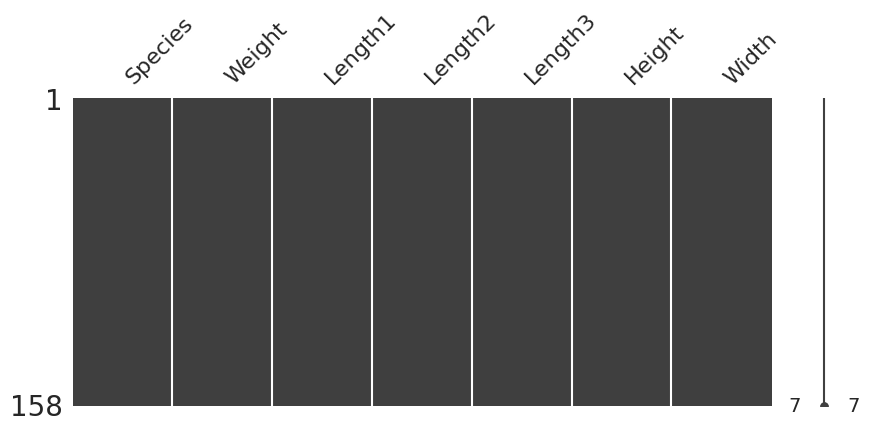

In [ ]:
msno.matrix(df1, figsize=(10, 4))

**8. Используя знания, полученные в ходе выполнения
лабораторной работы № 2, реализуйте
визуализацию многомерных данных**

In [4]:
# Кривые Эндрюса
def andrews_curve(x,theta):
  curve = list()
  for th in theta:
    x1 = x[0] / np.sqrt(2)
    x2 = x[1] * np.sin(th)
    x3 = x[2] * np.cos(th)
    x4 = x[3] * np.sin(2.*th)
    curve.append(x1+x2+x3+x4)
  return curve

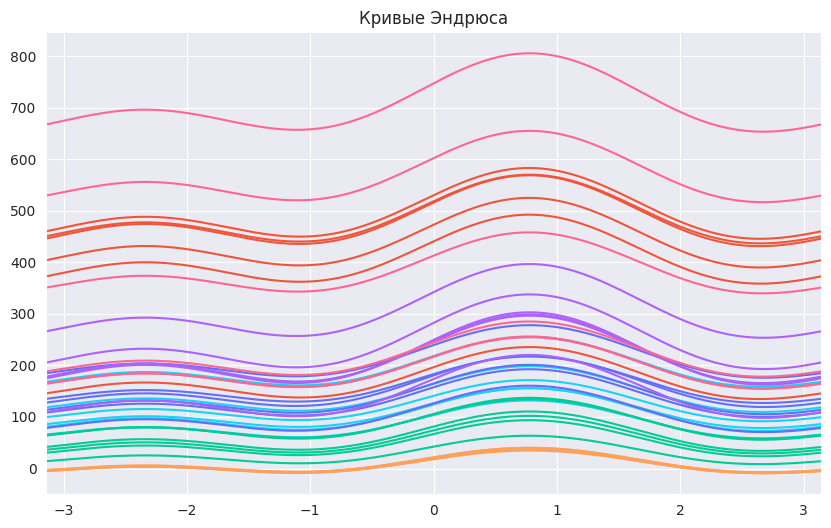

In [ ]:
#@title
species_sort = df1.sort_values(by=['Species'])
species_sort = species_sort.drop(['Species'], axis='columns')
arr = np.array(species_sort)

accuracy = 1000
samples = arr
theta = np.linspace(-np.pi, np.pi, accuracy)
pl.subplots(figsize=(10, 6))

for s in samples[:6]: # Bream
  pl.plot(theta, andrews_curve(s, theta), label='Bream', color='#EF553B')

for s in samples[35:41]: # Parkki
  pl.plot(theta, andrews_curve(s ,theta), label='Parkki', color='#19D3F3')

for s in samples[46:52]: # Perch
  pl.plot(theta, andrews_curve(s, theta), label='Perch', color='#636EFA')

for s in samples[102:108]: # Pike
  pl.plot(theta, andrews_curve(s, theta), label='Pike', color='#AB63FA')

for s in samples[119:125]: # Roach
  pl.plot(theta, andrews_curve(s, theta), label='Roach', color='#00CC96')

for s in samples[138:144]: # Smelt
  pl.plot(theta, andrews_curve(s, theta), label='Smelt', color='#FFA15A')

for s in samples[152:158]: # Whitefish
  pl.plot(theta, andrews_curve(s, theta), label='Whitefish', color='#FF6692')

pl.xlim(-np.pi,np.pi)
pl.title('Кривые Эндрюса')
# pl.legend()
pl.show()

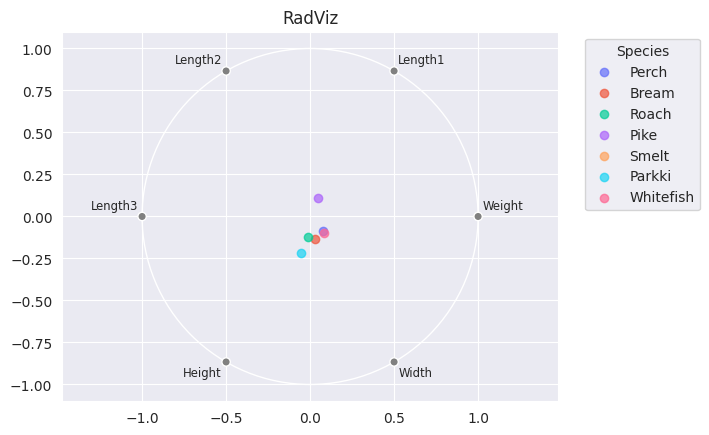

In [ ]:
# RadViz
pd.plotting.radviz(df_spec,'Species', color=colors,
                   alpha=0.7).legend(loc='upper right', title='Species', bbox_to_anchor=(1.3, 1))
plt.title('RadViz')
plt.show()

## 2. РЕГРЕССИОННЫЙ АНАЛИЗ


**9. Пусть переменная Weight (y) – независимая
(целевая) переменная. А одна из других –
зависимая (x). Постройте модель линейной
регрессии. Дайте общую оценку созданной
модели**

In [24]:
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

In [ ]:
y = df1['Weight']
X = df1['Width']
X = X.to_numpy().reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

lr=LinearRegression()
lr.fit(X_train, y_train)

y_train_pred=lr.predict(X_train)
y_test_pred=lr.predict(X_test)
# Коэффициент детерминации R2
print(f'R2 на тренировочных данных: {r2_score(y_train, y_train_pred)}')
print(f'R2 на тестовых данных: {r2_score(y_test, y_test_pred)}')

Ошибка на тренировочных данных: 0.8298829034389634
Ошибка на тестовых данных: 0.686831085047603


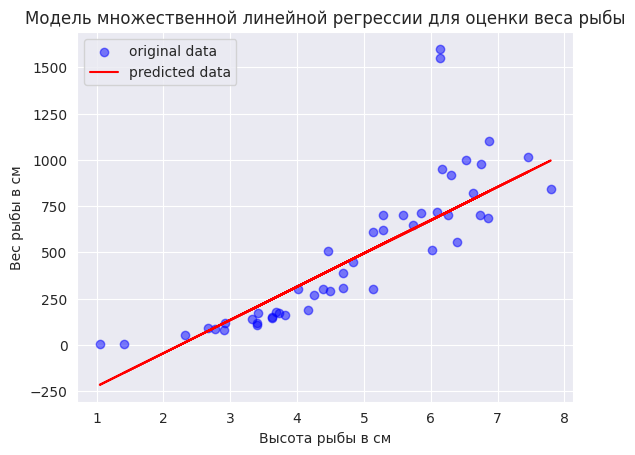

In [ ]:
plt.scatter(X_test, y_test, color='blue', alpha=0.5, label = "original data")
plt.plot(X_test, y_test_pred, color='red', alpha=1, label = "predicted data")
plt.legend()
plt.xlabel('Высота рыбы в см')
plt.ylabel('Вес рыбы в см')
plt.title('Модель парной линейной регрессии для оценки веса рыбы');

**10. Пусть переменная Weight (y) – независимая
(целевая) переменная. А все другие – зависимые
(xi). Постройте модель линейной регрессии.
Постройте график рассеяния (scatterplot) остатков
(residuals), проверьте распределение остатков на
нормальность. Дайте общую оценку созданной
модели**

In [ ]:
#@title
y = df1['Weight']
X = df1.iloc[:,2:7]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

lr=LinearRegression()
lr.fit(X_train, y_train)

y_train_pred=lr.predict(X_train)
y_test_pred=lr.predict(X_test)
# Коэффициент детерминации R2
print(f'R2 на тренировочных данных: {r2_score(y_train, y_train_pred)}')
print(f'R2 на тестовых данных: {r2_score(y_test, y_test_pred)}')

R2 на тренировочных данных: 0.8886556865744208
R2 на тестовых данных: 0.8504446106682089


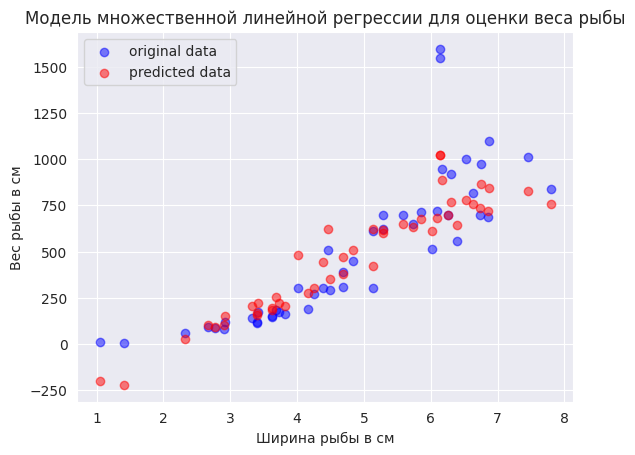

In [ ]:
plt.scatter(X_test['Width'], y_test, color='blue', alpha=0.5, label = "original data")
plt.scatter(X_test['Width'], y_test_pred, color='red', alpha=0.5, label = "predicted data")
plt.legend()
plt.xlabel('Ширина рыбы в см')
plt.ylabel('Вес рыбы в см')
plt.title('Модель множественной линейной регрессии для оценки веса рыбы');

Очевидно, многофакторная модель намного точнее однофакторной.

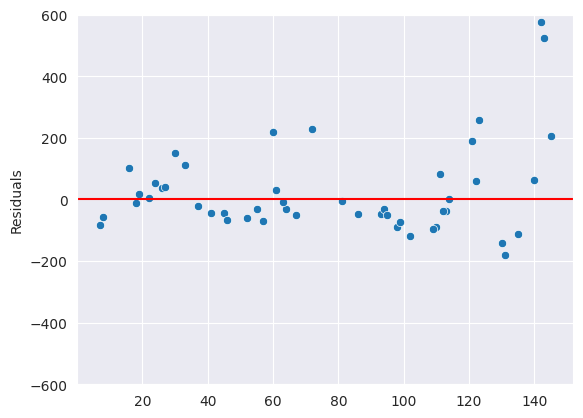

In [ ]:
residuals = y_test - y_test_pred
sns.scatterplot(residuals)
plt.axhline(y=0, color='r')
plt.ylabel('Residuals')
plt.ylim([-600,600])
plt.show()

Видим гетероскедантичность остатков.

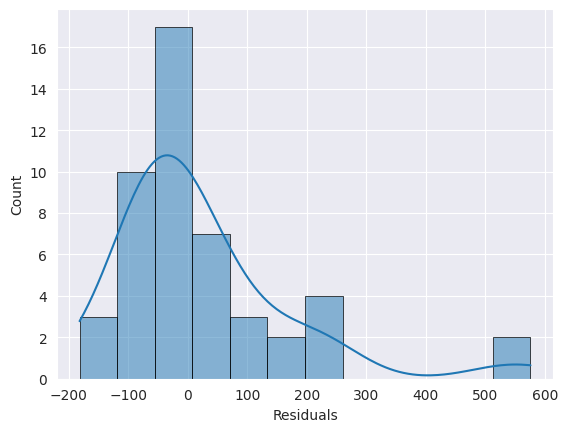

Остатки распределены ненормально.


In [ ]:
from scipy.stats import shapiro

sns.histplot(residuals, edgecolor='k', linewidth=0.5,kde=True)
plt.xlabel('Residuals')
plt.show()

stat, p = shapiro(residuals)
if p > 0.05:
    print("Остатки распределены нормально.")
else:
    print("Остатки распределены ненормально.")

**11. Найдите выбросы, наблюдения с высокой
степенью напряженности, влиятельные
наблюдения для модели, построенной в п.10.
Визуализируйте результаты**

In [ ]:
res = residuals[abs(residuals)>200]
res.index

Int64Index([123, 142, 143, 60, 145, 72], dtype='int64')

In [ ]:
y_test_drop = y_test.drop(index=[123, 142, 143, 60, 145, 72])
X_test_drop = X_test.drop(index=[123, 142, 143, 60, 145, 72])

In [ ]:
y_test_drop_pred=lr.predict(X_test_drop)
print(f'R2 на тестовых очищенных данных: {r2_score(y_test_drop, y_test_drop_pred)}')

R2 на тестовых очищенных данных: 0.9293120770119299


Коэффициент детерминации при прочих равных вырос - модель улучшила результат.

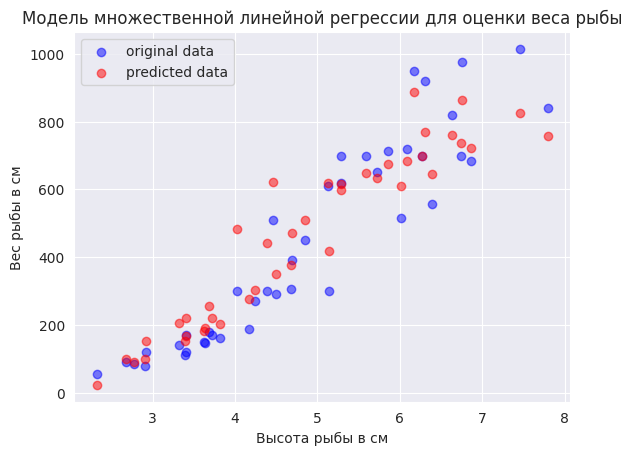

In [ ]:
plt.scatter(X_test_drop['Width'], y_test_drop, color='blue', alpha=0.5, label = "original data")
plt.scatter(X_test_drop['Width'], y_test_drop_pred, color='red', alpha=0.5, label = "predicted data")
plt.legend()
plt.xlabel('Высота рыбы в см')
plt.ylabel('Вес рыбы в см')
plt.title('Модель множественной линейной регрессии для оценки веса рыбы');

## 3. ДИСПЕРСИОННЫЙ АНАЛИЗ

**13. Выяснить на уровне значимости 5%, что вид Рыбы
зависит от всех параметров?**

H0 - признак Spicies зависит от всех параметров

# **Часть 2**

## 1. ПЕВИЧНЫЙ АНАЛИЗ ДАННЫХ. ВИЗУАЛИЗАЦИЯ

[Текст ссылки](https://www.kaggle.com/code/vijethrai/mental-health-in-depth-eda-tsne-cluster)



In [5]:
df2 = pd.read_csv('/content/drive/MyDrive/Data/Sample_3.csv')

In [6]:
df2.head(5)

,p_id,age,female,ethnicity,grip,chest,hex_5,hex_11,hex_17,hex_23,...,hex_41,hex_47,hex_53,hex_59,hex_65,hex_71,hex_77,hex_83,hex_89,hex_95
0,EXCL333,23,0,2,34.0,18.0,1,3,3,1,...,3,1,4,1,3,3,3,3,4,1
1,EXCL364,19,0,4,30.0,14.0,4,4,2,1,...,4,5,3,4,1,5,4,3,5,3
2,PLH001,18,1,5,20.0,16.0,4,5,4,5,...,2,5,1,2,4,5,2,4,1,1
3,PLH002,19,0,7,38.0,72.0,2,1,2,3,...,4,4,2,5,2,3,4,2,4,4
4,PLH003,19,0,5,39.0,31.0,3,2,4,2,...,4,3,2,1,4,4,4,4,2,3


* age - Age of the participant. (Numeric)
* female - Gender of the participant (1 = Female, 0 = Male). (Categorical)
* ethnicity - Ethnicity of the participant. (1=American Indian, 2=Asian-American, 4=Black/African-American, 5=White, 6=Hispanic/Latino, 7=Biracial, 8="Other"). (Categorical)
* grip - Grip strength of the participant. (kg/F). (Numeric)
* chest - chest strength of the participant. (kg/F).(Numeric)
* hex_5, hex_29, hex_53, hex_77 - Fearfulness scores of the participant. (Numeric)
* hex_11, hex_35, hex_59, hex_83 - Anxiety scores of the participant. (Numeric)
* hex_17, hex_41, hex_65, hex_89 - Sentimentalism scores of the participant. (Numeric)
* hex_23, hex_47, hex_71, hex_95 - Emotional Dependence scores of the participant. (Numeric)

```
hex_5: I would feel afraid if I had to travel in bad weather conditions.
hex_11: I sometimes can't help worrying about little things.
hex_17: When I suffer from a painful experience, I need someone to make me feel comfortable.
hex_23: I feel like crying when I see other people crying.
hex_29: I don't mind doing jobs that involve dangerous work.
hex_35: I worry a lot less than most people do.
hex_41: I can handle difficult situations without needing emotional support from anyone else.
hex_47: When someone I know well is unhappy, I can almost feel that person's pain myself.
hex_53: When it comes to physical danger, I am very fearful.
hex_59: I rarely, if ever, have trouble sleeping due to stress or anxiety.
hex_65: Whenever I feel worried about something, I want to share my concern with another person.
hex_71: I feel strong emotions when someone close to me is going away for a long time.
hex_77: Even in an emergency I wouldn't feel like panicking.
hex_83: I get very anxious when waiting to hear about an important decision.
hex_89: I rarely discuss my problems with other people.
hex_95: I remain unemotional even in situations where most people get very sentimental.
```



In [7]:
df2['Fearfulness']=df2[['hex_5', 'hex_29', 'hex_53', 'hex_77']].mean(axis=1)
df2 = df2.drop(['hex_5', 'hex_29', 'hex_53', 'hex_77'], axis=1)

df2['Anxiety']=df2[['hex_11', 'hex_35', 'hex_59', 'hex_83']].mean(axis=1)
df2 = df2.drop(['hex_11', 'hex_35', 'hex_59', 'hex_83'], axis=1)

df2['Sentimentalism']=df2[['hex_17', 'hex_41', 'hex_65', 'hex_89']].mean(axis=1)
df2 = df2.drop(['hex_17', 'hex_41', 'hex_65', 'hex_89'], axis=1)

df2['Emotional']=df2[['hex_23', 'hex_47', 'hex_71', 'hex_95']].mean(axis=1)
df2 = df2.drop(['hex_23', 'hex_47', 'hex_71', 'hex_95'], axis=1)

In [8]:
df2.head(5)

,p_id,age,female,ethnicity,grip,chest,Fearfulness,Anxiety,Sentimentalism,Emotional
0,EXCL333,23,0,2,34.0,18.0,2.25,2.00,3.25,1.5
1,EXCL364,19,0,4,30.0,14.0,3.50,3.25,3.00,3.5
2,PLH001,18,1,5,20.0,16.0,2.75,3.25,2.75,4.0
3,PLH002,19,0,7,38.0,72.0,3.00,3.25,3.00,3.5
4,PLH003,19,0,5,39.0,31.0,2.75,2.50,3.50,3.0


In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370 entries, 0 to 369
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   p_id            370 non-null    object 
 1   age             370 non-null    int64  
 2   female          370 non-null    int64  
 3   ethnicity       370 non-null    int64  
 4   grip            370 non-null    float64
 5   chest           370 non-null    float64
 6   Fearfulness     370 non-null    float64
 7   Anxiety         370 non-null    float64
 8   Sentimentalism  370 non-null    float64
 9   Emotional       370 non-null    float64
dtypes: float64(6), int64(3), object(1)
memory usage: 29.0+ KB


In [10]:
df2.describe()

,age,female,ethnicity,grip,chest,Fearfulness,Anxiety,Sentimentalism,Emotional
count,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000
mean,19.427027,0.551351,4.643243,28.295946,25.535946,2.889189,3.333108,3.263514,3.258108
std,1.781058,0.498030,1.413167,12.705395,16.087608,0.481590,0.477493,0.449879,0.539687
min,18.000000,0.000000,1.000000,5.000000,1.000000,1.000000,2.000000,1.750000,1.500000
25%,18.000000,0.000000,5.000000,18.000000,14.000000,2.500000,3.000000,3.000000,3.000000
50%,19.000000,1.000000,5.000000,26.000000,21.000000,3.000000,3.250000,3.250000,3.250000
75%,20.000000,1.000000,5.000000,37.000000,34.750000,3.000000,3.750000,3.500000,3.500000
max,34.000000,1.000000,8.000000,100.000000,105.000000,5.000000,4.750000,4.750000,5.000000


In [11]:
sns.set_style("darkgrid")
colors = px.colors.cyclical.HSV[:7]
Ethno = df2['ethnicity'].value_counts()
sex = df2['female'].value_counts()

In [12]:
df2['female'].value_counts()

1    204
0    166
Name: female, dtype: int64

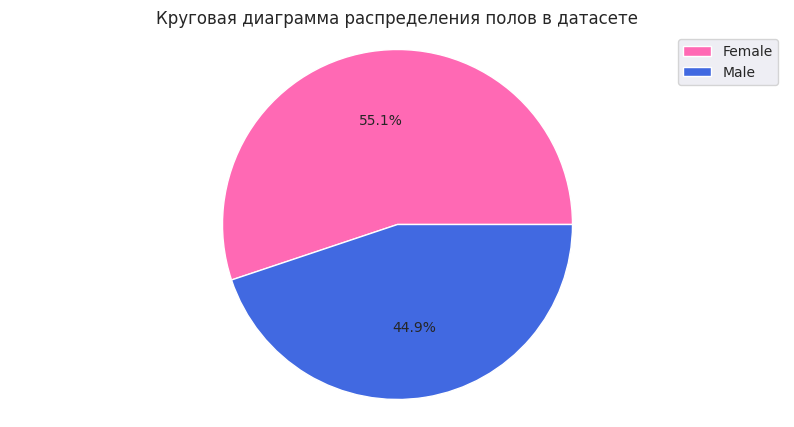

In [13]:
# Круговая диаграмма
vals = sex
labels = ['Female', 'Male']
fig, ax = plt.subplots(figsize=(10,5))
ax.pie(vals, autopct='%1.1f%%', colors=['hotpink','royalblue'])
ax.axis('equal')
plt.legend(labels=labels)
plt.title('Круговая диаграмма распределения полов в датасете')
plt.show()

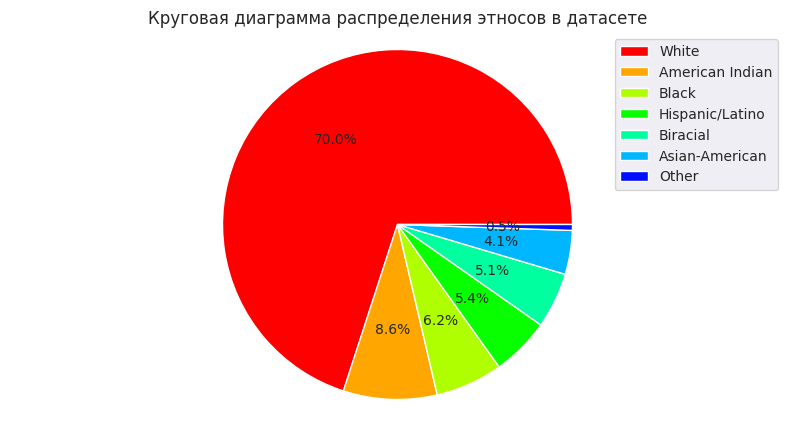

In [14]:
# Круговая диаграмма
vals = Ethno
labels = ['White','American Indian','Black','Hispanic/Latino','Biracial','Asian-American','Other']
fig, ax = plt.subplots(figsize=(10,5))
ax.pie(vals, autopct='%1.1f%%', colors=colors)
ax.axis('equal')
plt.legend(labels=labels)
plt.title('Круговая диаграмма распределения этносов в датасете')
plt.show()

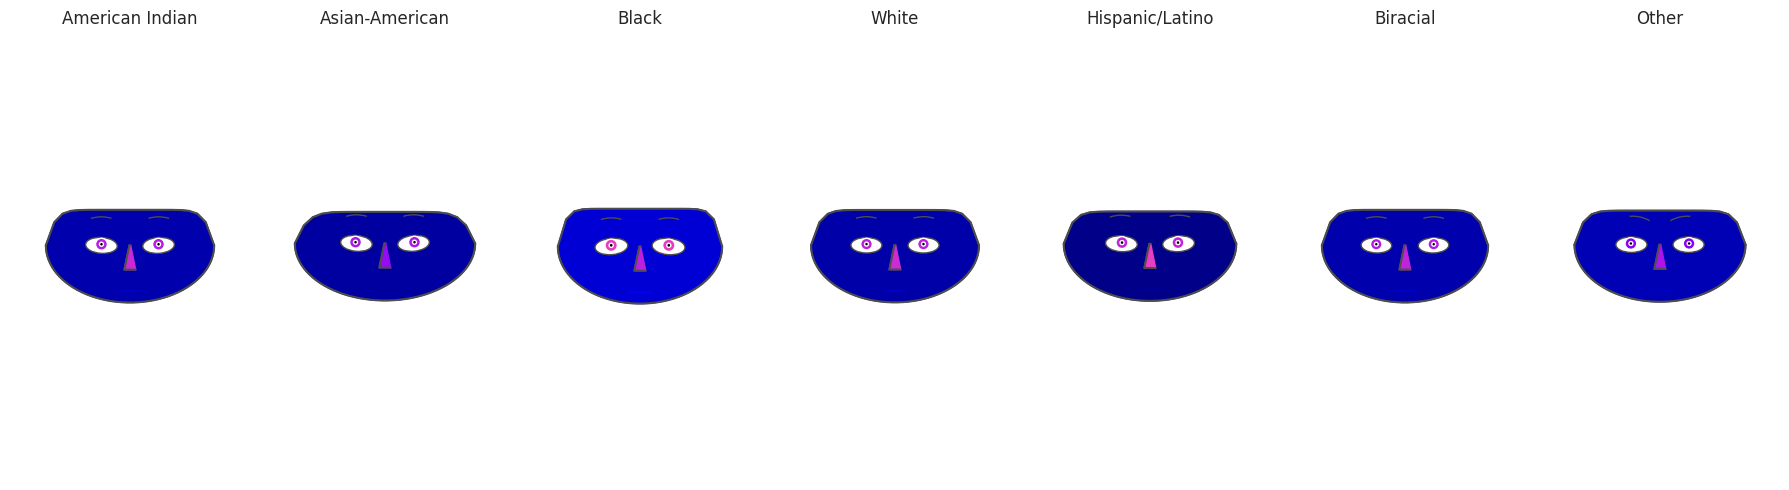

In [15]:
# Лица Чернова
Ethno2 = pd.DataFrame(df2['ethnicity'])
Ethno2[['age','grip','chest','Fearfulness','Anxiety','Sentimentalism','Emotional']] = variables_rescale(df2[['age','grip','chest','Fearfulness','Anxiety','Sentimentalism','Emotional']])

df_spec = Ethno2.groupby(['ethnicity']).mean().reset_index()
df_spec = df_spec.drop(['ethnicity'], axis='columns')

fig = chernoff_face(data=df_spec, titles=['American Indian', 'Asian-American', 'Black', 'White', 'Hispanic/Latino', 'Biracial', 'Other'],
                    n_columns=7,
                    long_face=False,
                    color_mapper=matplotlib.cm.gnuplot2,
                    figsize=(18, 5), dpi=100)
fig.tight_layout()
matplotlib.pyplot.show()

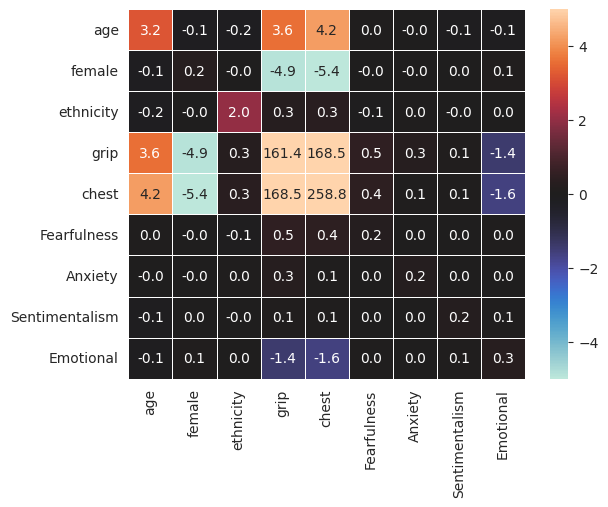

In [16]:
# Ковариационная матрица
sns.heatmap(df2.cov(), annot=True, fmt=".1f", linewidths=0.5, linecolor='white', vmin=-5, vmax=5, center=0)
plt.show()

<Axes: >

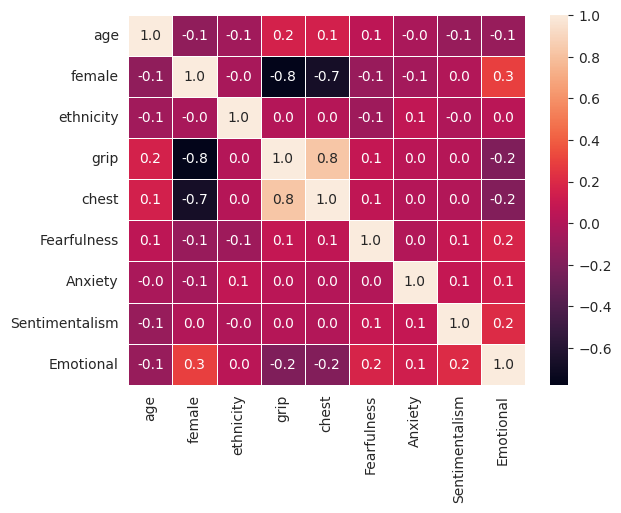

In [17]:
# Корреляционная матрица
sns.heatmap(df2.corr(), annot = True, linewidths=0.5, linecolor='white', fmt=".1f")

Видим значимую положительную корреляцию силы хвата и жима лежа, небольшую связь между полом участника и эмоцональностью и отрицательную корреляцию женского пола и силовых признаков.

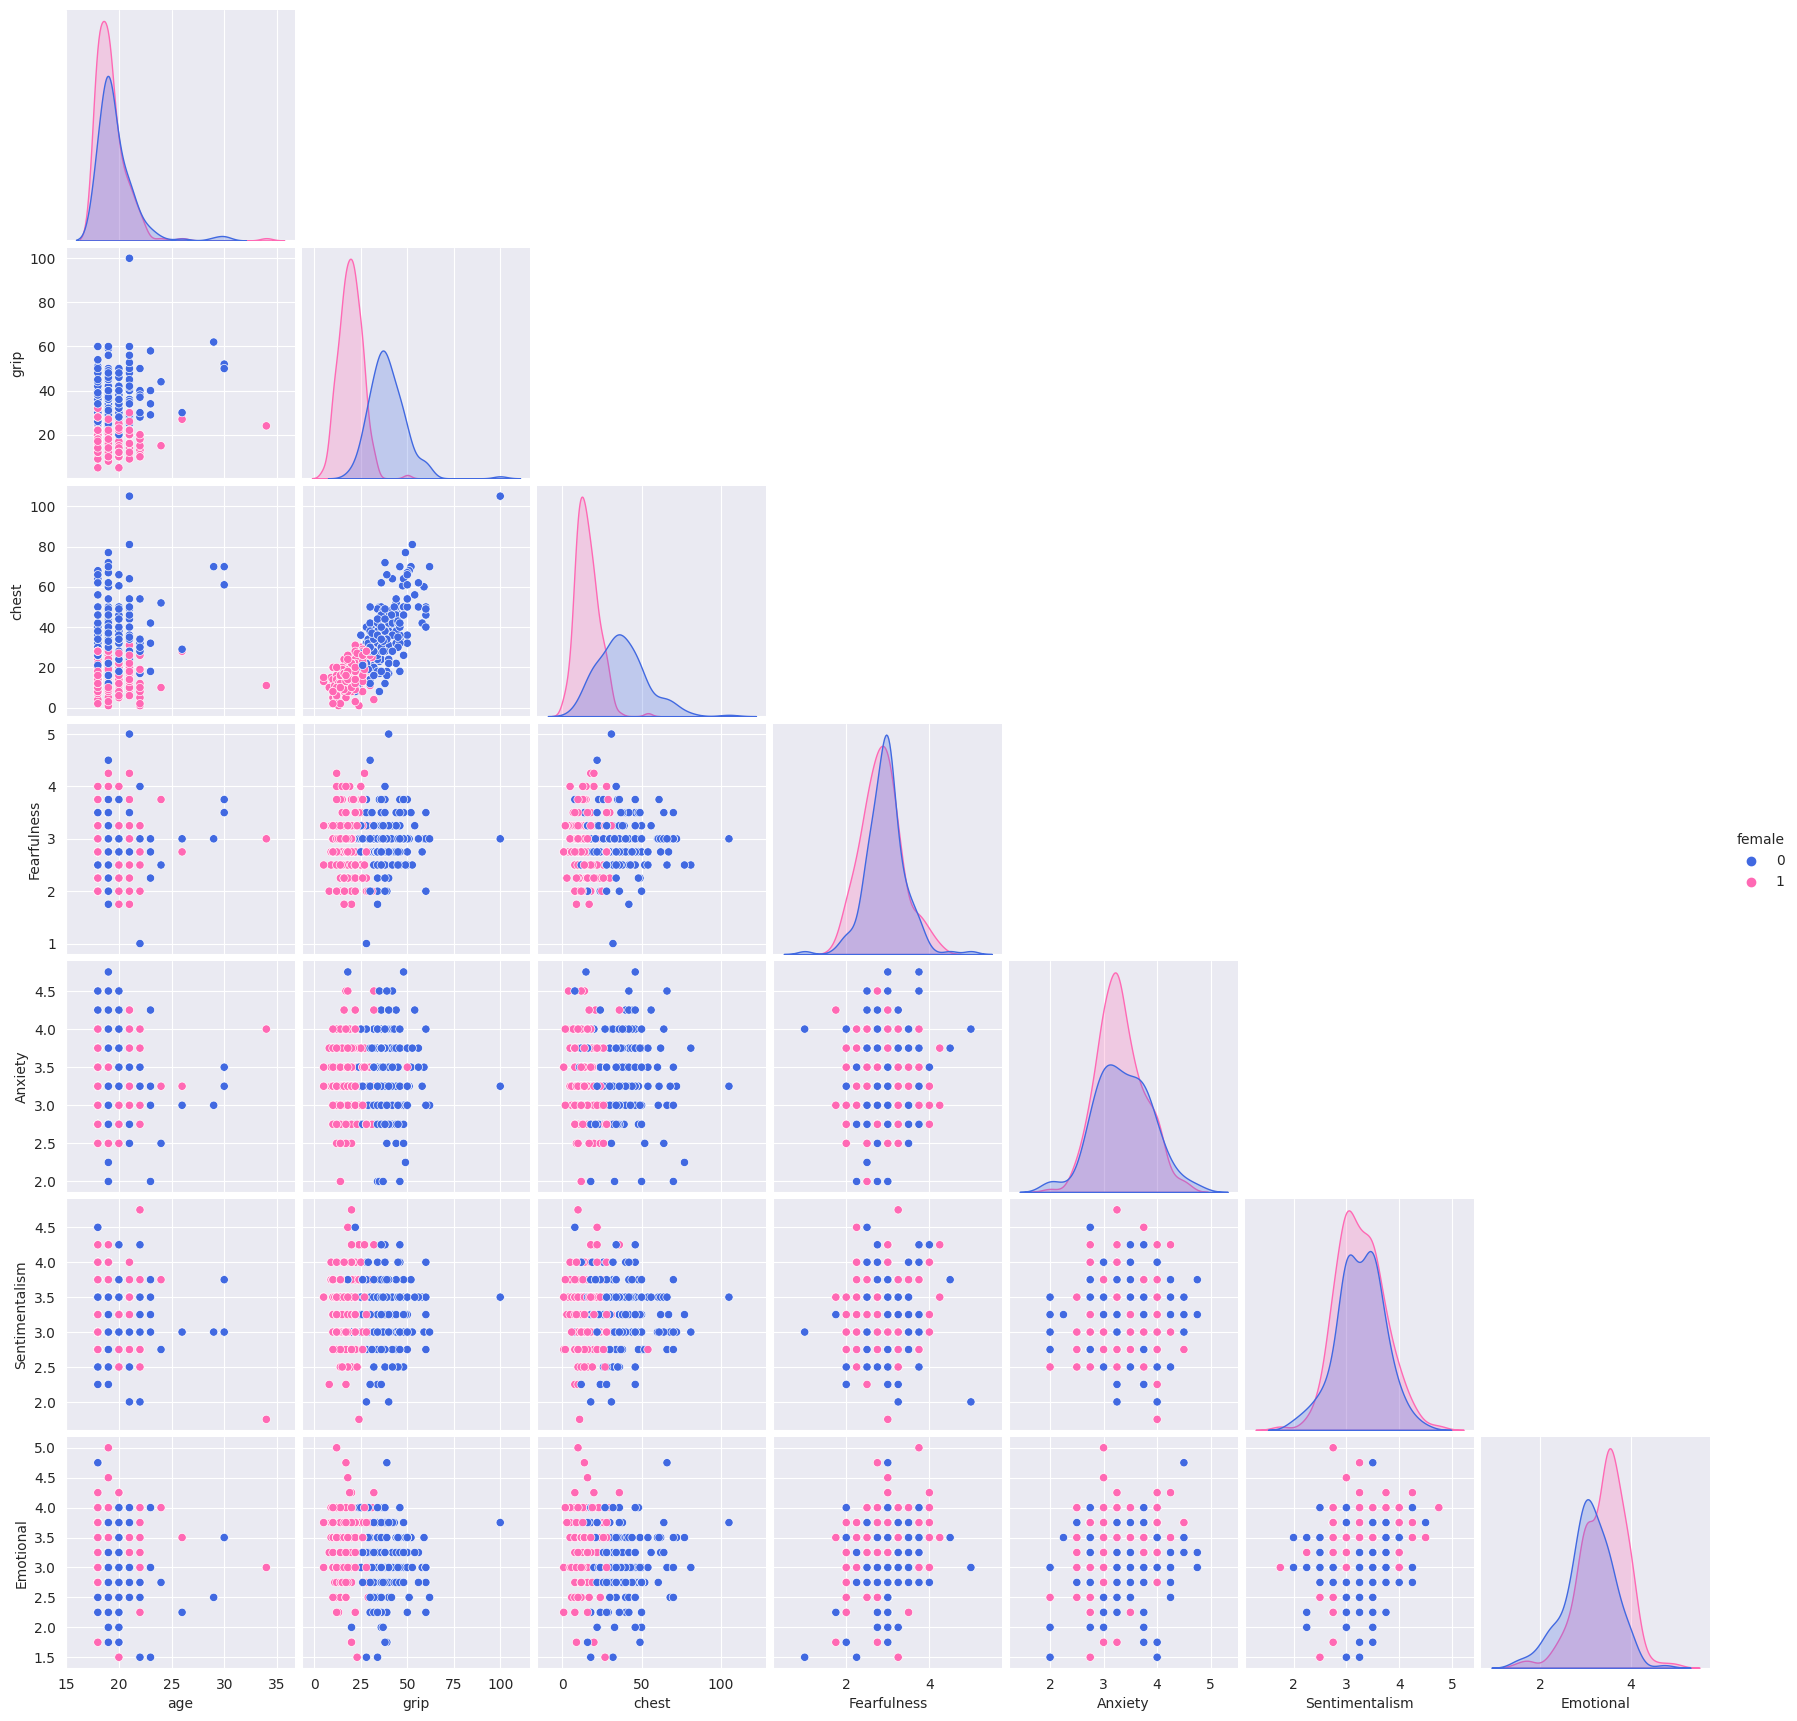

In [18]:
sns.pairplot(df2, hue = "female", vars=['age','grip','chest','Fearfulness','Anxiety','Sentimentalism','Emotional'], corner=True, palette=['royalblue','hotpink'])

Наблюдаем линейную зависимость силы хвата и жима лежа. Также по графикам видим, что женщины имеют меньшие значения показателей силы и большую эмоциональность.

In [19]:
# Гистограммы
fig = make_subplots(rows=3, cols=1)

trace0 = go.Histogram(x=df2['age'], name="age")
trace1 = go.Histogram(x=df2['grip'], name="grip")
trace2 = go.Histogram(x=df2['chest'], name="chest")
trace3 = go.Histogram(x=df2['Fearfulness'], name="Fearfulness")
trace4 = go.Histogram(x=df2['Anxiety'], name="Anxiety")
trace5 = go.Histogram(x=df2['Sentimentalism'], name="Sentimentalism")
trace6 = go.Histogram(x=df2['Emotional'], name="Emotional")

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 2, 1)
fig.append_trace(trace2, 2, 1)
fig.append_trace(trace3, 3, 1)
fig.append_trace(trace4, 3, 1)
fig.append_trace(trace5, 3, 1)
fig.append_trace(trace6, 3, 1)

fig.update_layout(bargap=0.2)
fig.update_layout(title_text="Гистограммы для количественных признаков")
fig.show()

In [20]:
# Интерактивный боксплот с распределением весов
box = []
for i in sex.index:
  box.append(go.Box(y=df2[df2['female']==i].grip, name=str(i)))
iplot(box)

На боксплотах присутствуют выбросы, но значения нельзя назвать аномальными.

<Axes: >

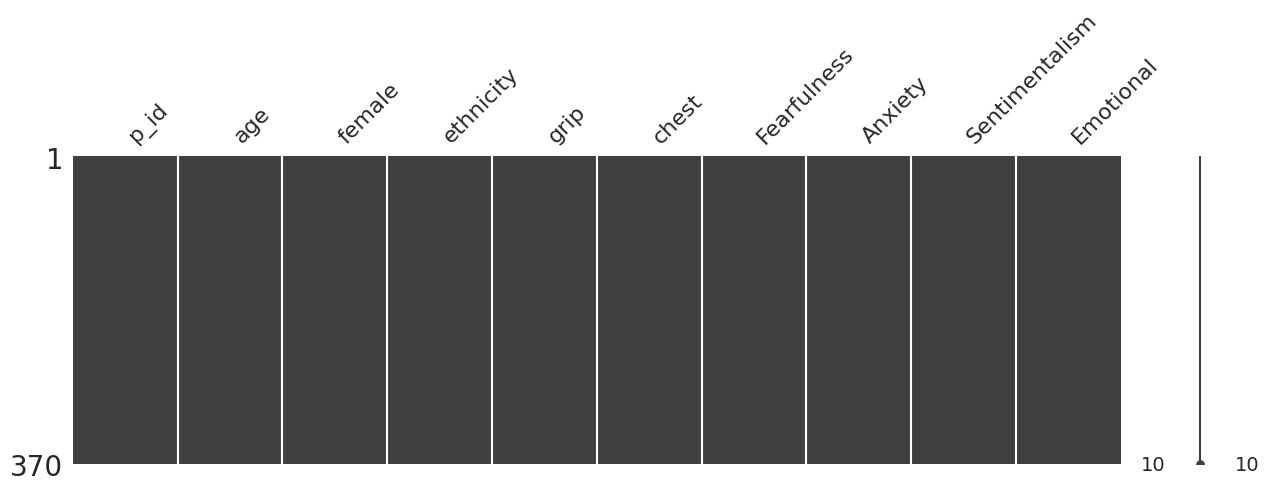

In [21]:
msno.matrix(df2, figsize=(15, 4))

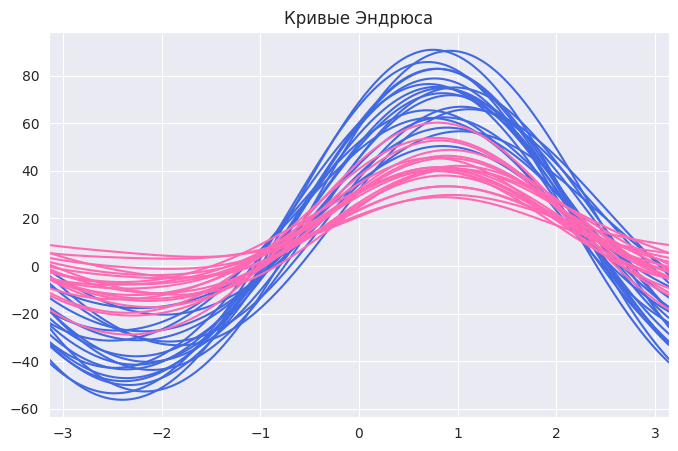

In [22]:
#@title
# Кривые Эндрюса ['hotpink','royalblue']
sex_sort = df2.sort_values(by=['female'])
sex_sort = sex_sort.drop(['female','ethnicity','p_id'], axis='columns')
arr = np.array(sex_sort)

accuracy = 1000
samples = arr
theta = np.linspace(-np.pi, np.pi, accuracy)
pl.subplots(figsize=(8, 5))

for s in samples[:20]: # Male
  pl.plot(theta, andrews_curve(s, theta), label='Male', color='royalblue')

for s in samples[200:220]: # Female
  pl.plot(theta, andrews_curve(s ,theta), label='Female', color='hotpink')

pl.xlim(-np.pi,np.pi)
pl.title('Кривые Эндрюса')
# pl.legend()
pl.show()

## 2. РЕГРЕССИОННЫЙ АНАЛИЗ


**Парная регрессия**

In [40]:
y = df2['grip']
X = df2['chest']
X = X.to_numpy().reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

lr=LinearRegression()
lr.fit(X_train, y_train)

y_train_pred=lr.predict(X_train)
y_test_pred=lr.predict(X_test)
# Коэффициент детерминации R2
print(f'R2 на тренировочных данных: {r2_score(y_train, y_train_pred)}')
print(f'R2 на тестовых данных: {r2_score(y_test, y_test_pred)}')

Ошибка на тренировочных данных: 0.6795993021833696
Ошибка на тестовых данных: 0.6723607699308027


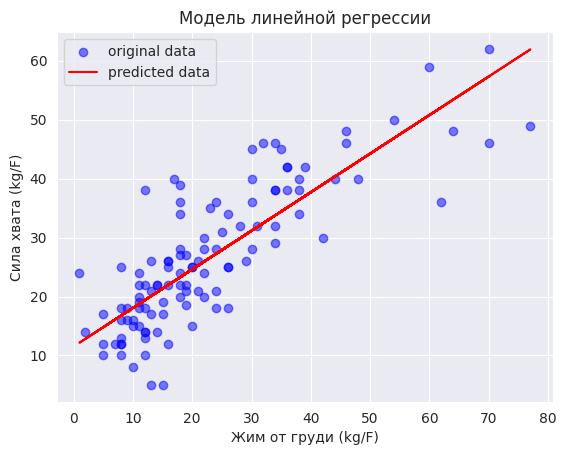

In [29]:
plt.scatter(X_test, y_test, color='blue', alpha=0.5, label = "original data")
plt.plot(X_test, y_test_pred, color='red', alpha=1, label = "predicted data")
plt.legend()
plt.xlabel('Жим от груди (kg/F)')
plt.ylabel('Сила хвата (kg/F)')
plt.title('Модель линейной регрессии');

**Множественная регрессия**

In [53]:
y = df2['grip']
df22 = df2.drop(['grip', 'p_id'], axis='columns')
X = df22

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

lr=LinearRegression()
lr.fit(X_train, y_train)

y_train_pred=lr.predict(X_train)
y_test_pred=lr.predict(X_test)
# Коэффициент детерминации R2
print(f'R2 на тренировочных данных: {r2_score(y_train, y_train_pred)}')
print(f'R2 на тестовых данных: {r2_score(y_test, y_test_pred)}')


R2 на тренировочных данных: 0.7568984604530911
R2 на тестовых данных: 0.7889193168081288


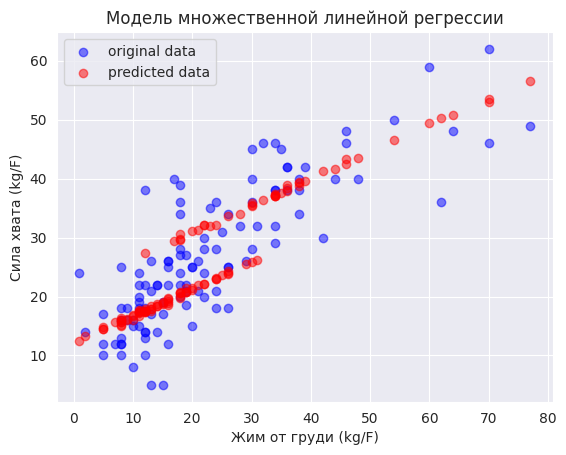

In [55]:
plt.scatter(X_test['chest'], y_test, color='blue', alpha=0.5, label = "original data")
plt.scatter(X_test['chest'], y_test_pred, color='red', alpha=0.5, label = "predicted data")
plt.legend()
plt.xlabel('Жим от груди (kg/F)')
plt.ylabel('Сила хвата (kg/F)')
plt.title('Модель множественной линейной регрессии');

Многофакторная модель показала наиболее точный результат.

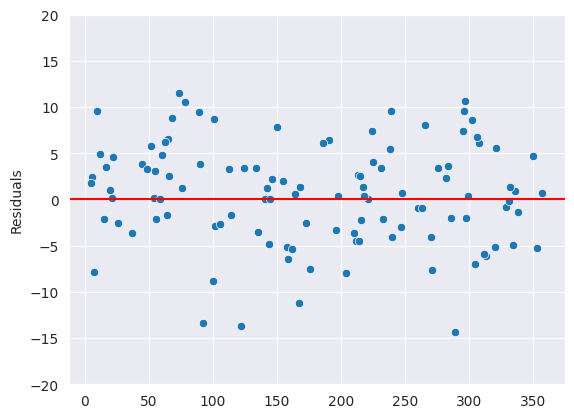

In [57]:
residuals = y_test - y_test_pred
sns.scatterplot(residuals)
plt.axhline(y=0, color='r')
plt.ylabel('Residuals')
plt.ylim([-20,20])
plt.show()

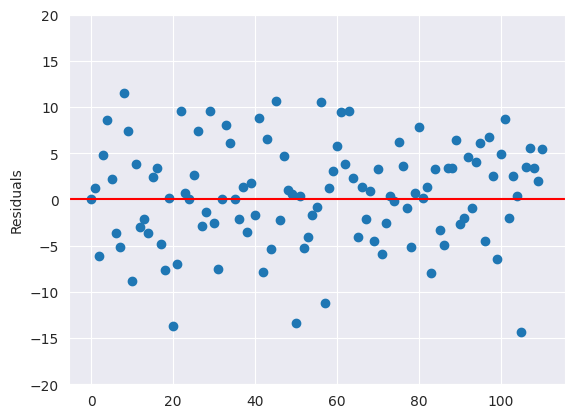

In [64]:
plt.scatter(range(len(residuals)), residuals)

plt.axhline(y=0, color='r')
plt.ylabel('Residuals')
plt.ylim([-20,20])
plt.show()
plt.show()

In [69]:
residuals2 = residuals.reset_index()
residuals2 = residuals2.drop(['index'], axis='columns')
residuals2.mean()


In [73]:
residuals2.var()

grip    30.117114
dtype: float64

In [81]:
fit = smf.ols('grip ~ age+chest+Fearfulness+Anxiety+Sentimentalism+Emotional+female+ethnicity', data=df2).fit()

#view model summary
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                   grip   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     149.5
Date:                Fri, 30 Jun 2023   Prob (F-statistic):          1.18e-109
Time:                        05:34:39   Log-Likelihood:                -1194.6
No. Observations:                 370   AIC:                             2407.
Df Residuals:                     361   BIC:                             2442.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         15.9177      5.610      2.

Text(0, 0.5, 'Exam Score')

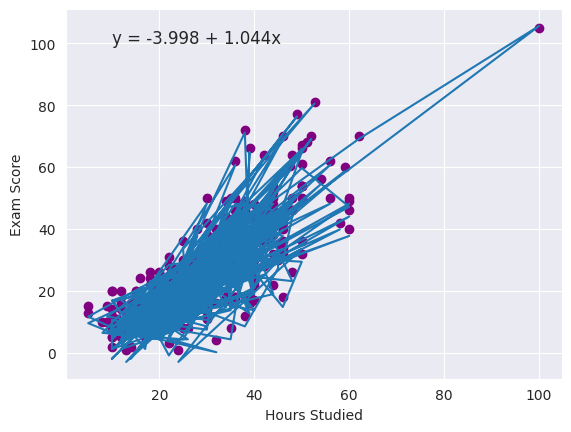

In [104]:
#find line of best fit
a, b = np.polyfit(df2['grip'], df2['chest'], 1)

#add points to plot
plt.scatter(df2['grip'], df2['chest'], color='purple')

#add line of best fit to plot
plt.plot(df2['grip'], a*df2['chest']+b)

#add fitted regression equation to plot
plt.text(10, 100, 'y = ' + '{:.3f}'.format(b) + ' + {:.3f}'.format(a) + 'x', size=12)

#add axis labels
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')

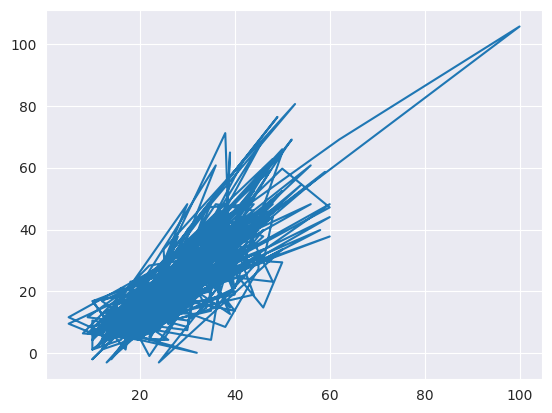

In [101]:
plt.plot(df2['grip'], a*df2['chest']+b)


In [ ]:
y_train_pred=lr.predict(X_train)
y_test_pred=lr.predict(X_test)
# Коэффициент детерминации R2
print(f'R2 на тренировочных данных: {r2_score(y_train, y_train_pred)}')
print(f'R2 на тестовых данных: {r2_score(y_test, y_test_pred)}')


In [96]:
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

#perform Bresuch-Pagan test
test = sms.het_breuschpagan(fit.resid, fit.model.exog)

 # Extracting the p-value from the test results
p_value = test[1]

# Checking the homoscedasticity based on the p-value
if p_value < 0.05:
    print("Остатки гетероскедастичны.")
else:
    print("Остатки гомоскедастичны.")

Остатки гетероскедастичны.


In [97]:
fit.model.exog

array([[ 1.  , 23.  , 18.  , ...,  1.5 ,  0.  ,  2.  ],
       [ 1.  , 19.  , 14.  , ...,  3.5 ,  0.  ,  4.  ],
       [ 1.  , 18.  , 16.  , ...,  4.  ,  1.  ,  5.  ],
       ...,
       [ 1.  , 22.  ,  2.  , ...,  4.  ,  1.  ,  5.  ],
       [ 1.  , 18.  , 28.  , ...,  3.75,  1.  ,  5.  ],
       [ 1.  , 20.  , 34.  , ...,  3.  ,  0.  ,  1.  ]])